In [1]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

import openpyxl

In [3]:

# Example read:
df_sequences = pd.read_csv("dataverse_files/family_classification_sequences.csv", sep=",")

# Inspect columns
#print(df_sequences.head())


In [4]:
df_metadata = pd.read_excel("dataverse_files/family_classification_metadata.xlsx")
print(df_sequences.head())

c:\Users\trinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


                                           Sequences
0  MAFSAEDVLKEYDRRRRMEALLLSLYYPNDRKLLDYKEWSPPRVQV...
1  MSIIGATRLQNDKSDTYSAGPCYAGGCSAFTPRGTCGKDWDLGEQT...
2  MQNPLPEVMSPEHDKRTTTPMSKEANKFIRELDKKPGDLAVVSDFV...
3  MDSLNEVCYEQIKGTFYKGLFGDFPLIVDKKTGCFNATKLCVLGGK...
4  MEAKNITIDNTTYNFFKFYNINQPLTNLKYLNSERLCFSNAVMGKI...


In [7]:
df_sequences.shape

(324018, 1)

In [5]:
df_trigrams = pd.read_csv("dataverse_files/protVec_100d_3grams.csv", header=None, skiprows=1, sep = "\t")
df_trigrams.columns = ["trigram"] + [f"dim_{i}" for i in range(1, 101)] # name the columns dim 1 to dim 100


In [9]:
df_trigrams.head

<bound method NDFrame.head of      trigram     dim_1     dim_2     dim_3     dim_4     dim_5     dim_6  \
0        AAA -0.174060 -0.095756  0.059515  0.039673 -0.375934 -0.115415   
1        ALA -0.114085 -0.093288  0.155800 -0.037351 -0.121446  0.084037   
2        LLL -0.075594 -0.100834 -0.046616 -0.208980 -0.008596 -0.038612   
3        LAA -0.137546 -0.135425  0.121566 -0.038295 -0.212129  0.040009   
4        AAL -0.156112 -0.133524  0.114426 -0.020264 -0.058513  0.057005   
...      ...       ...       ...       ...       ...       ...       ...   
9043     TXY  0.014640 -0.040339 -0.177313 -0.142597 -0.027828 -0.002875   
9044     XGN  0.012529  0.100273 -0.084018 -0.068436 -0.004238 -0.016091   
9045     XWY -0.078238  0.026070 -0.078415 -0.124451 -0.081429 -0.034911   
9046     XTD  0.090840  0.045846 -0.023550 -0.090981 -0.103220  0.041702   
9047   <unk> -0.036558  0.015085 -0.042163 -0.079190 -0.001883 -0.008346   

         dim_7     dim_8     dim_9  ...    dim_91    dim_

In [7]:
# Create a dictionary for fast lookup
trigram_dict = {row["trigram"]: row.iloc[1:].values.astype(float) 
                for _, row in df_trigrams.iterrows()}

In [8]:
# create a function to generate overlapping 3-mers
def generate_trigrams(sequence):
    """Generate overlapping 3-grams from a sequence."""
    return [sequence[i:i+3] for i in range(len(sequence) - 2)]

In [9]:
# function to map the 3mers to its embedding
def sequence_to_embedding(sequence, trigram_dict):
    """Convert a protein sequence to a ProtVec embedding by averaging its 3-gram embeddings."""
    trigrams = generate_trigrams(sequence)
    vectors = [trigram_dict[t] for t in trigrams if t in trigram_dict]
    if not vectors:
        # Return a zero vector if no trigrams were found
        return np.zeros(100)
    return np.mean(vectors, axis=0) # averaging!! 

In [ ]:
# reduce dataframe -> try it on
#df_sequences_reduce = df_sequences[1:1000]

In [ ]:
#3️ Convert Sequences into Embeddings for the reduced datafrane 

#embeddings = []
#for idx, row in df_sequences_reduce.iterrows():
 #   sequence = row["Sequences"]  # Use the correct column name from sequences_df
  #  emb_vec = sequence_to_embedding(sequence, trigram_dict)
  #  embeddings.append(emb_vec)

#X = np.array(embeddings)
#print("Shape of X (embeddings):", X.shape)


Shape of X (embeddings): (999, 100)


In [14]:
#Convert Sequences into Embeddings for the whole dataframe
#Apply the function to each sequence directly using pandas apply
df_sequences["embedding"] = df_sequences["Sequences"].apply(
    lambda seq: sequence_to_embedding(seq, trigram_dict)
)
# Convert embeddings to a NumPy array
X = np.vstack(df_sequences["embedding"].values)
print("Shape of X (embeddings):", X.shape)


Shape of X (embeddings): (324018, 100)


In [43]:
print(df_sequences.head)

<bound method NDFrame.head of                                                 Sequences  \
0       MAFSAEDVLKEYDRRRRMEALLLSLYYPNDRKLLDYKEWSPPRVQV...   
1       MSIIGATRLQNDKSDTYSAGPCYAGGCSAFTPRGTCGKDWDLGEQT...   
2       MQNPLPEVMSPEHDKRTTTPMSKEANKFIRELDKKPGDLAVVSDFV...   
3       MDSLNEVCYEQIKGTFYKGLFGDFPLIVDKKTGCFNATKLCVLGGK...   
4       MEAKNITIDNTTYNFFKFYNINQPLTNLKYLNSERLCFSNAVMGKI...   
...                                                   ...   
324013  MGLRYSKEVRERHGDKDLEGRVPMTLNLPQGLYGRFNCKSCWFANR...   
324014  MGNSKSKSKLSANQYEQQTVNSTKQVAILKRQAEPSLYGRHNCRCC...   
324015  MGNCNRTQKPSSSSNNLEKPPQAAEFRRTAEPSLYGRYNCKCCWFA...   
324016  MGLRYSKEVRDRHGDKDPEGRIPITQTMPQTLYGRYNCKSCWFANK...   
324017  MGLRYSKDVKDRYGDREPEGRIPITLNMPQSLYGRYNCKSCWFANK...   

                                                embedding  
0       [-0.06262441338582679, -0.005613614173228345, ...  
1       [-0.04964331761006288, -0.000859311320754717, ...  
2       [-0.06365829207920794, 0.006032252475247531, 0...

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [16]:
# Get the top 5 most common families
common_families = df_metadata["Family ID"].value_counts().head(5).index.tolist()
print(common_families)

['MMR_HSR1', 'Helicase_C', 'ATP-synt_ab', '7tm_1', 'AA_kinase']


In [17]:

# Concatenate df_sequences and df_metadata by index
df_combined = pd.concat([df_sequences, df_metadata], axis=1)

# Check the merged dataframe to confirm
df_filtered = df_combined[df_combined['Family ID'].isin(common_families)]
print(df_filtered.shape)


(11559, 7)


Accuracy: 95.76%

Classification Report:
              precision    recall  f1-score   support

       7tm_1       0.98      0.98      0.98       355
   AA_kinase       0.95      0.95      0.95       339
 ATP-synt_ab       1.00      0.95      0.98       498
  Helicase_C       0.92      0.97      0.94       479
    MMR_HSR1       0.95      0.94      0.95       641

    accuracy                           0.96      2312
   macro avg       0.96      0.96      0.96      2312
weighted avg       0.96      0.96      0.96      2312



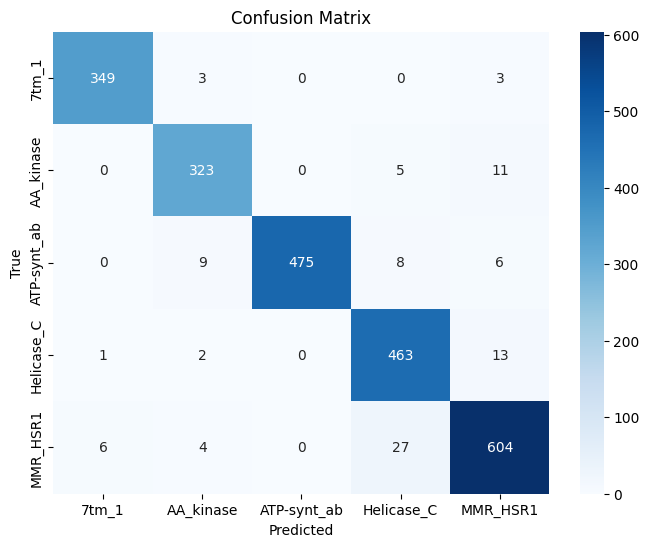

In [18]:
#train a classifier (like Random Forest) on the filtered data:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Extract features (embeddings) and labels (family)
X = np.vstack(df_filtered['embedding'])  # Convert list of arrays to a 2D array
y = df_filtered['Family ID']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 96.19%

Classification Report:
              precision    recall  f1-score   support

       7tm_1       0.98      0.97      0.98       355
   AA_kinase       0.95      0.97      0.96       339
 ATP-synt_ab       1.00      0.95      0.97       498
  Helicase_C       0.91      0.99      0.95       479
    MMR_HSR1       0.98      0.94      0.96       641

    accuracy                           0.96      2312
   macro avg       0.96      0.96      0.96      2312
weighted avg       0.96      0.96      0.96      2312



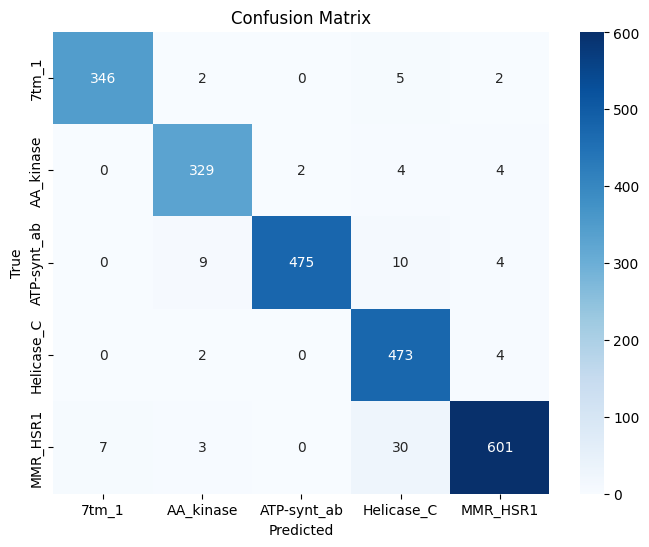

In [50]:

from sklearn.svm import SVC
# Split the data into training and testing sets (80% train, 20% test)

# Initialize the Support Vector Machine classifier (with a radial basis function kernel)
svm_clf = SVC(kernel='rbf', random_state=42)

# Train the model
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=svm_clf.classes_)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_clf.classes_, yticklabels=svm_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [21]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming df_filtered is already loaded
X = np.vstack(df_filtered['embedding'])
y = df_filtered['Family ID']

# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y) 

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define a simple neural network
model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


Epoch 1/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4753 - loss: 1.3035 - val_accuracy: 0.8211 - val_loss: 0.5519
Epoch 2/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8667 - loss: 0.4361 - val_accuracy: 0.9130 - val_loss: 0.3284
Epoch 3/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9286 - loss: 0.2918 - val_accuracy: 0.9422 - val_loss: 0.2417
Epoch 4/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9503 - loss: 0.2188 - val_accuracy: 0.9514 - val_loss: 0.1972
Epoch 5/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9564 - loss: 0.1886 - val_accuracy: 0.9568 - val_loss: 0.1757
Epoch 6/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9570 - loss: 0.1649 - val_accuracy: 0.9541 - val_loss: 0.1707
Epoch 7/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9533 - loss: 0.1695 - val_accuracy: 0.9600 - val_loss: 0.1596
Epoch 8/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9677 - loss: 0.1306 - val_accuracy:

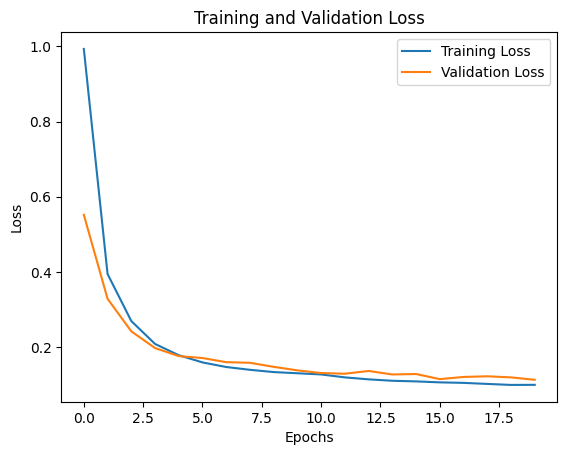

In [23]:

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [24]:
# Taking the sum instead
def sequence_to_embedding(sequence, trigram_dict):
    """Convert a protein sequence to a ProtVec embedding by summing its 3-gram embeddings."""
    trigrams = generate_trigrams(sequence)
    vectors = [trigram_dict[t] for t in trigrams if t in trigram_dict]
    
    if not vectors:
        # Return a zero vector if no trigrams were found
        return np.zeros(100)
    
    return np.sum(vectors, axis=0)  # Now using summation instead of averaging


#Convert Sequences into Embeddings for the whole dataframe
#Apply the function to each sequence directly using pandas apply
df_sequences["embedding"] = df_sequences["Sequences"].apply(
    lambda seq: sequence_to_embedding(seq, trigram_dict)
)
# Convert embeddings to a NumPy array
X = np.vstack(df_sequences["embedding"].values)
print("Shape of X (embeddings):", X.shape)



Shape of X (embeddings): (324018, 100)


In [25]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming df_filtered is already loaded
X = np.vstack(df_filtered['embedding'])
y = df_filtered['Family ID']

# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y) 

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define a simple neural network
model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


Epoch 1/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4186 - loss: 1.3501 - val_accuracy: 0.8449 - val_loss: 0.5435
Epoch 2/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8829 - loss: 0.4361 - val_accuracy: 0.9281 - val_loss: 0.3087
Epoch 3/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9344 - loss: 0.2750 - val_accuracy: 0.9411 - val_loss: 0.2443
Epoch 4/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9463 - loss: 0.2170 - val_accuracy: 0.9454 - val_loss: 0.2032
Epoch 5/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9536 - loss: 0.1859 - val_accuracy: 0.9530 - val_loss: 0.1759
Epoch 6/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9567 - loss: 0.1697 - val_accuracy: 0.9535 - val_loss: 0.1786
Epoch 7/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9630 - loss: 0.1422 - val_accuracy: 0.9562 - val_loss: 0.1583
Epoch 8/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9603 - loss: 0.1468 - val_accuracy: 

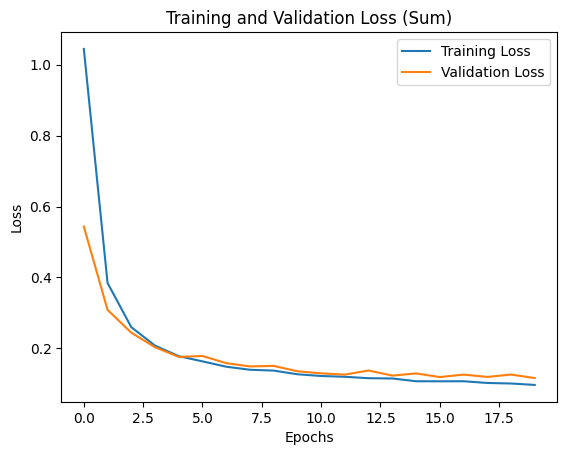

In [ ]:
#
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (Sum)')
plt.show()